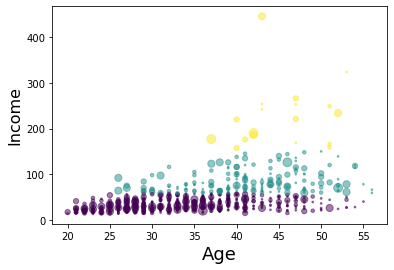

MEAN OF ALL THE CLUSTERS TO BETTER DEFINE THEM VISUALLY 




,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


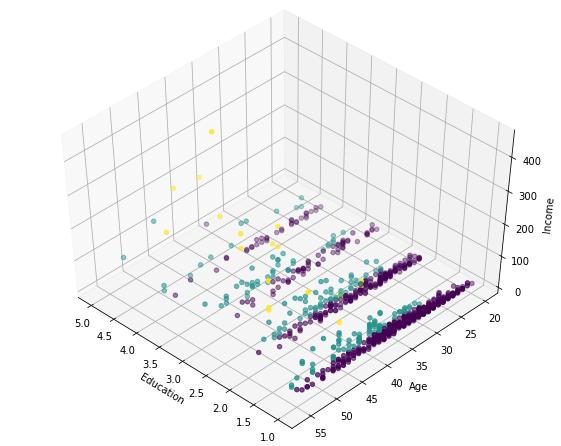

In [38]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

df = pd.read_csv('Cust_Segmentation.csv')
df.head(5)

df = df.drop('Address',axis=1)
df.head()

# Data Normalization
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
#X_Clus = StandardScaler().fit_transform(X)
#X_Clus

#Model Creation
num_cluster = 3
model_kMeans = KMeans(init='k-means++', n_clusters=num_cluster, n_init=12)
model_kMeans.fit(X)
labels=model_kMeans.labels_
centers=model_kMeans.cluster_centers_

df["Clus_km"] = labels
df.head(5)




area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()



from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


print("MEAN OF ALL THE CLUSTERS TO BETTER DEFINE THEM VISUALLY \n\n")
df.groupby('Clus_km').mean()